## Importação de Ferramentas e Ajuste da Base de Dados

In [1]:
#Impórtação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import io


In [2]:
#importando arquivo do pc
uploaded = files.upload()

Saving AcoesBruto.csv to AcoesBruto.csv


In [204]:
#carregando DataFrame com os dados das ações do Brasil entre JAN/2018 a MAR/2021
dados = pd.read_csv(io.BytesIO(uploaded['AcoesBruto.csv']), encoding='latin1',sep=';')
dados.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,price.open,price.high,price.low,price.close,volume,price.adjusted,ref.date,ticker,ret.adjusted.prices,ret.closing.prices,Empresa,Setor,Subsetor,Tipo,Classificação
0,"14,94","15,16","14,7","14,89",94500,"14,74",2018-01-02,AALR3.SA,NaN,NaN,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
1,"14,89","15,32","14,79","14,96",584700,"14,81",2018-01-03,AALR3.SA,"0,00470117769938838","0,0047011417058429",ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
2,15,"15,16","14,81","15,09",290100,"14,94",2018-01-04,AALR3.SA,"0,00868974180746784","0,00868983957219238",ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
3,"15,05","15,17","14,95","15,05",131500,"14,9",2018-01-05,AALR3.SA,"-0,00265069648310279","-0,00265076209410198",ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
4,"15,05","15,1","14,62","14,79",244500,"14,64",2018-01-08,AALR3.SA,"-0,017275687925577","-0,0172757475083057",ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap


In [205]:
#Ajustando nomes do cabeçalho
dados.columns = ['abertura',	'alta',	'baixa',	'fechamento',	'volume',	'Ajustado',	'data',	'codigo',	'Ajuste Preço',
                 'Ajuste fechamento', 'Empresa',	'Setor',	'Subsetor',	'Tipo',	'Classificação']
dados.head()

,abertura,alta,baixa,fechamento,volume,Ajustado,data,codigo,Ajuste Preço,Ajuste fechamento,Empresa,Setor,Subsetor,Tipo,Classificação
0,"14,94","15,16","14,7","14,89",94500,"14,74",2018-01-02,AALR3.SA,NaN,NaN,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
1,"14,89","15,32","14,79","14,96",584700,"14,81",2018-01-03,AALR3.SA,"0,00470117769938838","0,0047011417058429",ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
2,15,"15,16","14,81","15,09",290100,"14,94",2018-01-04,AALR3.SA,"0,00868974180746784","0,00868983957219238",ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
3,"15,05","15,17","14,95","15,05",131500,"14,9",2018-01-05,AALR3.SA,"-0,00265069648310279","-0,00265076209410198",ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
4,"15,05","15,1","14,62","14,79",244500,"14,64",2018-01-08,AALR3.SA,"-0,017275687925577","-0,0172757475083057",ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap


In [206]:
#removendo o .SA do final do codigo das ações
dados['codigo'] = dados['codigo'].map(lambda x: x.rstrip('.SA'))


# Explorando a base de dados para entender o DataSet e extrarir algumas informações preliminares

In [207]:
#describe do DS
dados.describe()

,abertura,alta,baixa,fechamento,volume,Ajustado,data,codigo,Ajuste Preço,Ajuste fechamento,Empresa,Setor,Subsetor,Tipo,Classificação
count,298861,298861,298861,298861,298861.0,298861,298861,298861,298486,298486,298861,298861,298861,298861,298861
unique,8984,9072,8882,8897,96452.0,9213,835,375,170467,128927,283,11,41,3,7
top,5,5,5,5,0.0,12,2020-01-24,MMAQ3,0,0,SUL AMERICA,Consumo Cíclico,Energia Elétrica,Ordinaria,Mid Cap
freq,1649,1629,1697,1647,50130.0,1037,375,816,84391,84741,2391,64595,39053,214422,77292


In [208]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298861 entries, 0 to 298860
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   abertura           298861 non-null  object
 1   alta               298861 non-null  object
 2   baixa              298861 non-null  object
 3   fechamento         298861 non-null  object
 4   volume             298861 non-null  object
 5   Ajustado           298861 non-null  object
 6   data               298861 non-null  object
 7   codigo             298861 non-null  object
 8   Ajuste Preço       298486 non-null  object
 9   Ajuste fechamento  298486 non-null  object
 10  Empresa            298861 non-null  object
 11  Setor              298861 non-null  object
 12  Subsetor           298861 non-null  object
 13  Tipo               298861 non-null  object
 14  Classificação      298861 non-null  object
dtypes: object(15)
memory usage: 34.2+ MB


In [209]:
#numeros com virgula são interpretados como textos e não como numeros, logo precisamos substituir as ',' por '.'
dados.replace({',': '.'}, regex=True, inplace=True)

In [210]:
#Covnertendo as colunas com valores para tipos numericos
dados["abertura"] = pd.to_numeric(dados["abertura"])
dados["alta"] = pd.to_numeric(dados["alta"])
dados["baixa"] = pd.to_numeric(dados["baixa"])
dados["fechamento"] = pd.to_numeric(dados["fechamento"])
dados["Ajustado"] = pd.to_numeric(dados["Ajustado"])
dados["Ajuste Preço"] = pd.to_numeric(dados["Ajuste Preço"])
dados["Ajuste fechamento"] = pd.to_numeric(dados["Ajuste fechamento"])

In [211]:
#Covnertendo a coluna de data em DateTime
dados["data"] = pd.to_datetime(dados["data"])

In [212]:
#Quantidade de ativos apresentados
qtd_ativos = len(dados['Empresa'].unique())
qtd_ativos

283

Vamos ver agora quais são os setores e sub setores que compoem o nosso DS.

In [213]:
setores = dados['Setor'].unique()
setores

array(['Saúde', 'Financeiro', 'Consumo não Cíclico', 'Utilidade Pública',
       'Consumo Cíclico', 'Outros', 'Bens Industriais',
       'Materiais Básicos', 'Petróleo. Gás e Biocombustíveis',
       'Tecnologia da Informação', 'Comunicações'], dtype=object)

In [214]:
subsetores = dados['Subsetor'].unique()
subsetores

array(['Análises e Diagnósticos', 'Intermediários Financeiros', 'Bebidas',
       'Utilidade Pública', 'Agropecuária', 'Viagens e Lazer',
       'Tecidos. Vestuário e Calçados', 'Exploração de Imóveis',
       'Energia Elétrica', 'Comércio', 'Diversos',
       'Previdência e Seguros', 'Outros', 'Construção e Engenharia',
       'Transporte', 'Serviços Financeiros Diversos', 'Equipamentos',
       'Alimentos Processados', 'Máquinas e Equipamentos',
       'Medicamentos e Outros Produtos', 'Hoteis e Restaurantes',
       'Produtos de Uso Pessoal e de Limpeza', 'Comércio e Distribuição',
       'Mineração', 'Petróleo. Gás e Biocombustíveis', 'Químicos',
       'Construção Civil', 'Serviços Diversos', 'Água e Saneamento',
       'Gás', 'Siderurgia e Metalurgia', 'Madeira e Papel',
       'Material de Transporte', 'Utilidades Domésticas',
       'Automóveis e Motocicletas', 'Programas e Serviços',
       'Holdings Diversificadas', 'Embalagens', 'Telecomunicações',
       'Computadores e Equ

# Adaptando o DS com novas colunas e informações para iniciar analises mais metodologicas

In [215]:
#Vamos adicionar uma coluna de variação, e variação em %, de cada ativo naquele dia.
dados['Variação'] = dados['fechamento'] - dados['abertura']
dados['Variação (%)'] = 100*(dados['fechamento']/dados['abertura'] - 1)
dados

,abertura,alta,baixa,fechamento,volume,Ajustado,data,codigo,Ajuste Preço,Ajuste fechamento,Empresa,Setor,Subsetor,Tipo,Classificação,Variação,Variação (%)
0,14.94,15.16,14.70,14.89,94500,14.74,2018-01-02,AALR3,NaN,NaN,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-0.05,-0.334672
1,14.89,15.32,14.79,14.96,584700,14.81,2018-01-03,AALR3,0.004701,0.004701,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,0.07,0.470114
2,15.00,15.16,14.81,15.09,290100,14.94,2018-01-04,AALR3,0.008690,0.008690,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,0.09,0.600000
3,15.05,15.17,14.95,15.05,131500,14.90,2018-01-05,AALR3,-0.002651,-0.002651,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,0.00,0.000000
4,15.05,15.10,14.62,14.79,244500,14.64,2018-01-08,AALR3,-0.017276,-0.017276,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-0.26,-1.727575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298856,27.00,28.00,26.70,26.71,2806700,26.71,2021-03-24,YDUQ3,-0.010741,-0.010741,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.29,-1.074074
298857,26.81,27.73,26.26,27.73,2433000,27.73,2021-03-25,YDUQ3,0.038188,0.038188,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,0.92,3.431555
298858,27.64,27.75,26.60,27.09,1801000,27.09,2021-03-26,YDUQ3,-0.023080,-0.023080,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.55,-1.989870
298859,26.89,27.24,26.43,26.71,1223600,26.71,2021-03-29,YDUQ3,-0.014027,-0.014027,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.18,-0.669394


In [216]:
#Eliminando as linhas que não possuem variação
filtro = dados['Variação'] != 0
#filtro
dados = dados[filtro]
dados

,abertura,alta,baixa,fechamento,volume,Ajustado,data,codigo,Ajuste Preço,Ajuste fechamento,Empresa,Setor,Subsetor,Tipo,Classificação,Variação,Variação (%)
0,14.94,15.16,14.70,14.89,94500,14.74,2018-01-02,AALR3,NaN,NaN,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-0.05,-0.334672
1,14.89,15.32,14.79,14.96,584700,14.81,2018-01-03,AALR3,0.004701,0.004701,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,0.07,0.470114
2,15.00,15.16,14.81,15.09,290100,14.94,2018-01-04,AALR3,0.008690,0.008690,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,0.09,0.600000
4,15.05,15.10,14.62,14.79,244500,14.64,2018-01-08,AALR3,-0.017276,-0.017276,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-0.26,-1.727575
5,14.87,14.87,14.50,14.65,64200,14.50,2018-01-09,AALR3,-0.009466,-0.009466,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-0.22,-1.479489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298856,27.00,28.00,26.70,26.71,2806700,26.71,2021-03-24,YDUQ3,-0.010741,-0.010741,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.29,-1.074074
298857,26.81,27.73,26.26,27.73,2433000,27.73,2021-03-25,YDUQ3,0.038188,0.038188,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,0.92,3.431555
298858,27.64,27.75,26.60,27.09,1801000,27.09,2021-03-26,YDUQ3,-0.023080,-0.023080,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.55,-1.989870
298859,26.89,27.24,26.43,26.71,1223600,26.71,2021-03-29,YDUQ3,-0.014027,-0.014027,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.18,-0.669394


In [217]:
#Movimentação de cada empresa (quantidade de linhas para cada ativo)
dados['codigo'].value_counts()

SANB11    794
BRAP3     793
RENT3     793
ARZZ3     793
PETR3     793
         ... 
CEPE3       3
MSPA4       3
MAPT3       3
ODER4       1
CALI4       1
Name: codigo, Length: 358, dtype: int64

Ora Ora, temos empresas que apos tirarmos o dados vazios de movimentação apresentam poucas movimentações no periodo. Vamos ver a distribuição desses casos.

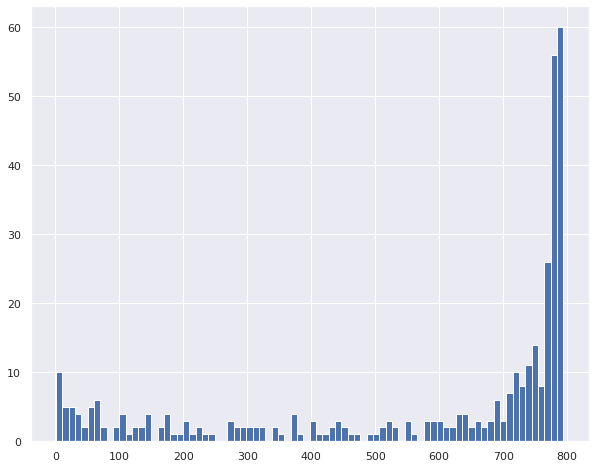

In [218]:

plt.figure(figsize=(10,8))
dados['codigo'].value_counts().hist(bins = 80) #onde bins é é o range de valores
plt.show()

O histograma indicou que temos algumas ações que possuem menos que 100 dias registrados. O periodo aqui disponibilizado é de pouco mais de 2 anos, logo faz mais sentido analisar apenas que tenham no minimo 300 dias de bolsa. Vamos filtrar novamente os dados

In [219]:
#Eliminando codigos que possuem pouco tempo de bolsa
dados['freq'] = dados.groupby('codigo')['codigo'].transform('count') #adicionando a coluna frequencia 
filtro = dados['freq'] > 300
dados = dados[filtro]
dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,abertura,alta,baixa,fechamento,volume,Ajustado,data,codigo,Ajuste Preço,Ajuste fechamento,Empresa,Setor,Subsetor,Tipo,Classificação,Variação,Variação (%),freq
0,14.94,15.16,14.70,14.89,94500,14.74,2018-01-02,AALR3,NaN,NaN,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-0.05,-0.334672,775
1,14.89,15.32,14.79,14.96,584700,14.81,2018-01-03,AALR3,0.004701,0.004701,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,0.07,0.470114,775
2,15.00,15.16,14.81,15.09,290100,14.94,2018-01-04,AALR3,0.008690,0.008690,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,0.09,0.600000,775
4,15.05,15.10,14.62,14.79,244500,14.64,2018-01-08,AALR3,-0.017276,-0.017276,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-0.26,-1.727575,775
5,14.87,14.87,14.50,14.65,64200,14.50,2018-01-09,AALR3,-0.009466,-0.009466,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-0.22,-1.479489,775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298856,27.00,28.00,26.70,26.71,2806700,26.71,2021-03-24,YDUQ3,-0.010741,-0.010741,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.29,-1.074074,785
298857,26.81,27.73,26.26,27.73,2433000,27.73,2021-03-25,YDUQ3,0.038188,0.038188,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,0.92,3.431555,785
298858,27.64,27.75,26.60,27.09,1801000,27.09,2021-03-26,YDUQ3,-0.023080,-0.023080,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.55,-1.989870,785
298859,26.89,27.24,26.43,26.71,1223600,26.71,2021-03-29,YDUQ3,-0.014027,-0.014027,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.18,-0.669394,785


# Analise dos Dados

Analise Grafica de um ativo qualquer

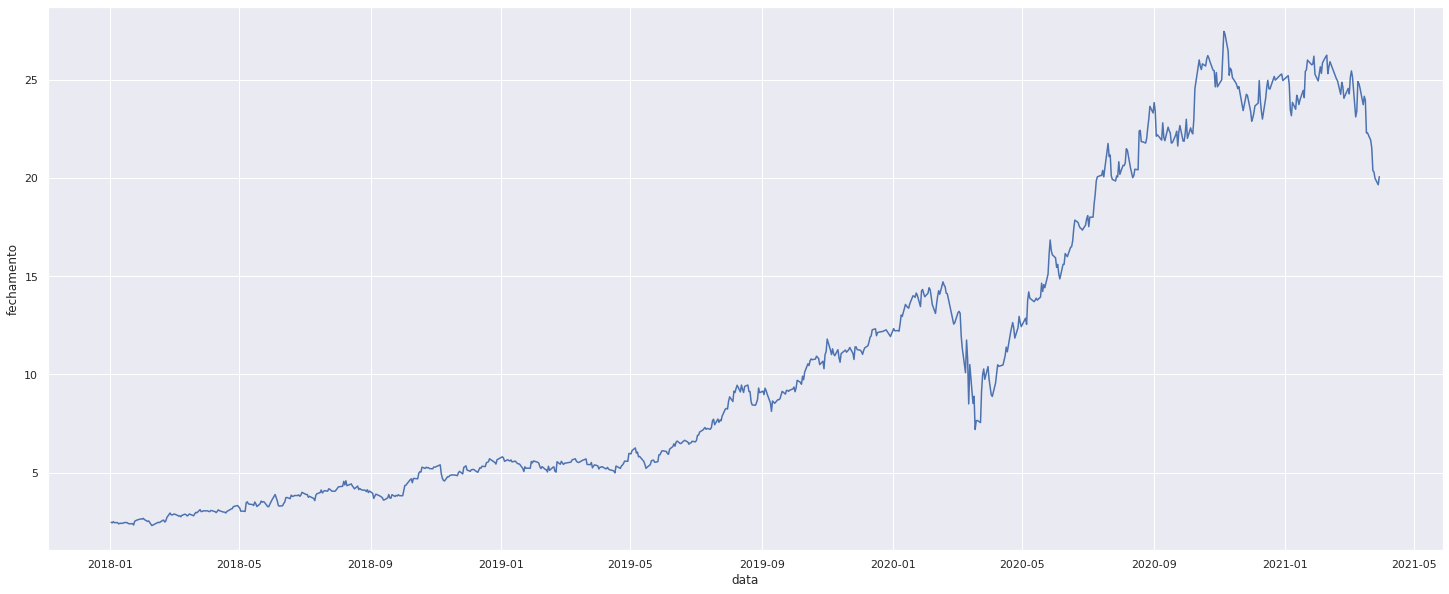

In [220]:
sns.set() #setando o Seaborn
plt.figure(figsize=(25,10))
sns.lineplot(data=dados.query("codigo =='MGLU3'"), x="data", y="fechamento")

Para fins de organização, criei um DataFrame com o codigo do ativo e a variação relativa entre a primeira data e a ultima data negociada.

In [221]:
#Criando um DataFrame com a variação de cada ativo
variacao_ativos = pd.DataFrame(columns=['Codigo','Inicio','Final','Variação','Valorização'])
ativos = dados['codigo'].unique()
i = 0
for ativo in ativos:
  primeiro = dados.query("codigo == @ativo").iloc[0]['abertura'] #primeiro valor de fechamento do ativo
  linhas = len(dados.query("codigo == @ativo")) #quantidade de linhas do ativo
  ultimo = dados.query("codigo == @ativo").iloc[linhas - 1]['fechamento'] #pega o ultimo fechamento do ativo
  variacao_ativos.loc[i] = [ativo, primeiro, ultimo, round(ultimo - primeiro,2), round((ultimo/primeiro - 1) * 100,2)]  #Adicionando a linha
  i = i + 1

variacao_ativos

,Codigo,Inicio,Final,Variação,Valorização
0,AALR3,14.94,9.00,-5.94,-39.76
1,ABCB4,16.71,14.84,-1.87,-11.19
2,ABEV3,21.33,15.59,-5.74,-26.91
3,AFLT3,4.96,9.02,4.06,81.85
4,AGRO3,12.45,22.16,9.71,77.99
...,...,...,...,...,...
276,WHRL4,4.99,7.80,2.81,56.31
277,WIZS3,11.79,7.15,-4.64,-39.36
278,WLMM4,5.25,28.99,23.74,452.19
279,WSON33,38.10,42.89,4.79,12.57


In [222]:
#Top 20 ativos mais valorizados
ativos_mais_valorizados = variacao_ativos.nlargest(20, 'Valorização')
ativos_mais_valorizados_cod = ativos_mais_valorizados['Codigo'].unique()
ativos_mais_valorizados


,Codigo,Inicio,Final,Variação,Valorização
245,TASA3,1.86,23.04,21.18,1138.71
133,IGBR3,1.08,13.00,11.92,1103.70
135,INEP4,2.84,32.30,29.46,1037.32
197,PRIO3,8.18,92.27,84.09,1028.00
246,TASA4,2.15,22.14,19.99,929.77
166,MMXM3,2.99,28.51,25.52,853.51
164,MGLU3,2.53,20.06,17.53,692.89
21,BAUH4,12.45,95.00,82.55,663.05
196,PPLA11,1.34,10.04,8.70,649.25
176,NORD3,2.80,20.69,17.89,638.93


## 20 ações que mais tiveram valorização em todo o periodo avaliado (2018 a mar/2021)

Essa analise é com base na primeira abertura e no ultimo Fechamento da Ação no periodo completo do conjunto de dados analisado

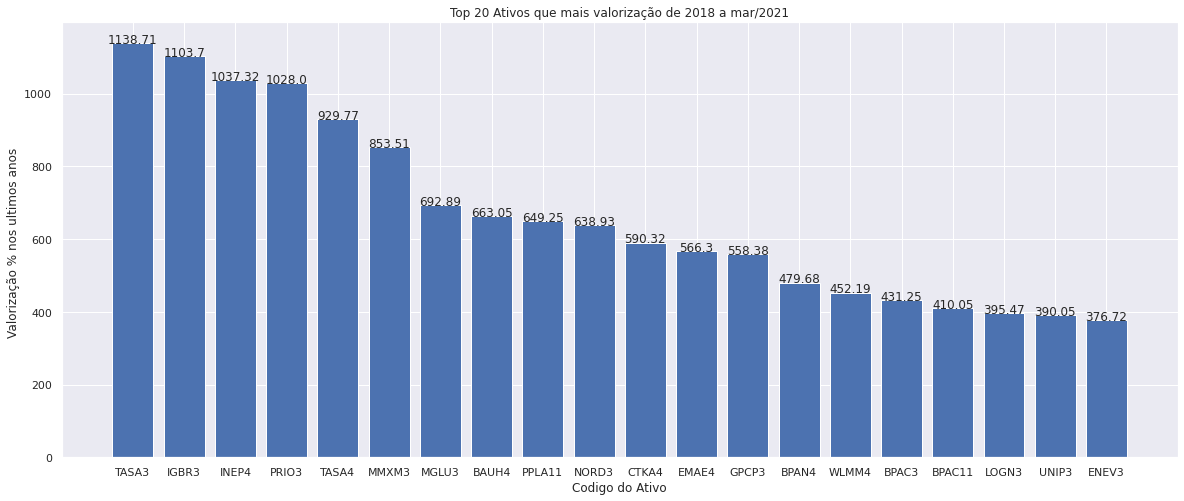

In [223]:
plt.figure(figsize=(20,8))
plt.bar('Codigo','Valorização',data=ativos_mais_valorizados)
#plt.xticks('Codigo')
plt.xlabel("Codigo do Ativo")
plt.ylabel("Valorização % nos ultimos anos ")
plt.title("Top 20 Ativos que mais valorização de 2018 a mar/2021")

for i, v in enumerate(ativos_mais_valorizados['Valorização']):
  plt.text(x=i , y = v + 10 , s=f"{v}",
           horizontalalignment='center',
           verticalalignment='center',
           fontdict=dict(fontsize=12)
           )
    
plt.show()

## Subsetores que mais valorizaram durante todo periodo avaliado (2018 a mar/2021)

In [245]:
#Criando um DataFrame com a variação de cada subsetor
#Qual ,metrica usar para os setores ????
valorizacao_subsetores = dados.groupby(by=["Subsetor"]).std()
valorizacao_subsetores

,abertura,alta,baixa,fechamento,Ajustado,Ajuste Preço,Ajuste fechamento,Variação,Variação (%),freq
Subsetor,,,,,,,,,,
Agropecuária,7.609412,7.759196,7.462250,7.614087,7.345031,0.038696,0.038685,0.486957,3.554809,71.216673
Alimentos Processados,16.088803,16.417106,15.859955,16.248900,16.113744,0.034211,0.034212,0.706661,3.209164,92.625699
Análises e Diagnósticos,14.977202,15.291117,14.656474,15.015612,15.047796,0.027982,0.027994,0.707392,2.455842,33.331182
Automóveis e Motocicletas,7.721359,7.763856,7.633595,7.696663,6.889916,0.036471,0.036569,0.413902,3.426947,114.645253
Bebidas,3.031924,3.008530,3.053188,3.041328,2.596216,0.021213,0.021234,0.279040,1.791873,0.000000
Computadores e Equipamentos,1.924200,2.000125,1.851656,1.918055,1.910165,0.043361,0.043352,0.199076,4.087349,0.000000
Comércio,18.906215,19.263473,18.499360,18.889539,18.707046,0.046270,0.046273,0.797074,4.329762,99.116692
Comércio e Distribuição,25.001750,25.617650,24.265790,24.950143,24.783213,2.677978,2.677980,0.764140,2.933744,189.985124
Construção Civil,8.886785,9.058677,8.703141,8.894891,8.643008,0.045542,0.045588,0.479895,4.220234,93.225076


## Ações que recuperaram no periodo pandemico (pós Mar/2020)

In [228]:
filtro = dados['data'] > '2020-03-01' #01 de Março de 2020
dados_pandemia = dados[filtro]
dados_pandemia

,abertura,alta,baixa,fechamento,volume,Ajustado,data,codigo,Ajuste Preço,Ajuste fechamento,Empresa,Setor,Subsetor,Tipo,Classificação,Variação,Variação (%),freq
531,19.00,20.48,18.90,20.08,593400,19.92,2020-03-02,AALR3,0.065252,0.065252,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,1.08,5.684211,775
532,20.69,21.17,19.95,20.16,578800,19.99,2020-03-03,AALR3,0.003984,0.003984,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-0.53,-2.561624,775
533,20.75,20.75,19.90,20.00,224800,19.84,2020-03-04,AALR3,-0.007937,-0.007937,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-0.75,-3.614458,775
534,20.21,20.21,18.71,18.83,222000,18.68,2020-03-05,AALR3,-0.058500,-0.058500,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-1.38,-6.828303,775
535,18.50,18.50,17.44,17.52,393400,17.38,2020-03-06,AALR3,-0.069570,-0.069570,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap,-0.98,-5.297297,775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298856,27.00,28.00,26.70,26.71,2806700,26.71,2021-03-24,YDUQ3,-0.010741,-0.010741,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.29,-1.074074,785
298857,26.81,27.73,26.26,27.73,2433000,27.73,2021-03-25,YDUQ3,0.038188,0.038188,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,0.92,3.431555,785
298858,27.64,27.75,26.60,27.09,1801000,27.09,2021-03-26,YDUQ3,-0.023080,-0.023080,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.55,-1.989870,785
298859,26.89,27.24,26.43,26.71,1223600,26.71,2021-03-29,YDUQ3,-0.014027,-0.014027,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap,-0.18,-0.669394,785


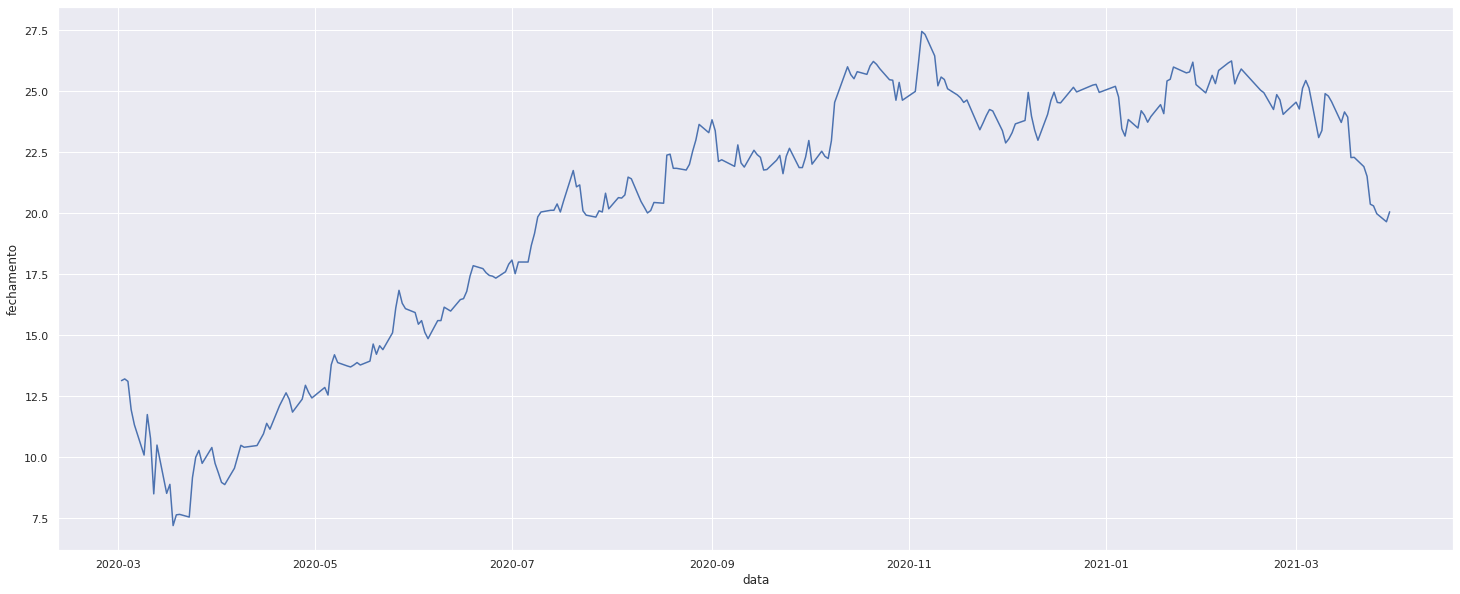

In [229]:
sns.set() #setando o Seaborn
plt.figure(figsize=(25,10))
sns.lineplot(data=dados_pandemia.query("codigo =='MGLU3'"), x="data", y="fechamento")

In [230]:
#Criando um DataFrame com a variação de cada ativo durante a pandemia
variacao_ativos_pandemia = pd.DataFrame(columns=['Codigo','Inicio','Final','Variação','Valorização'])
ativos_pandemia = dados_pandemia['codigo'].unique()
i = 0
for ativo in ativos_pandemia:
  primeiro = dados_pandemia.query("codigo == @ativo").iloc[0]['abertura'] #primeiro valor de fechamento do ativo
  linhas = len(dados_pandemia.query("codigo == @ativo")) #quantidade de linhas do ativo
  ultimo = dados_pandemia.query("codigo == @ativo").iloc[linhas - 1]['fechamento'] #pega o ultimo fechamento do ativo
  variacao_ativos_pandemia.loc[i] = [ativo, primeiro, ultimo, round(ultimo - primeiro,2), round((ultimo/primeiro - 1) * 100,2)]  #Adicionando a linha
  i = i + 1

variacao_ativos_pandemia

,Codigo,Inicio,Final,Variação,Valorização
0,AALR3,19.00,9.00,-10.00,-52.63
1,ABCB4,19.84,14.84,-5.00,-25.20
2,ABEV3,14.59,15.59,1.00,6.85
3,AFLT3,10.59,9.02,-1.57,-14.83
4,AGRO3,18.31,22.16,3.85,21.03
...,...,...,...,...,...
275,WHRL4,8.97,7.80,-1.17,-13.04
276,WIZS3,14.10,7.15,-6.95,-49.29
277,WLMM4,20.39,28.99,8.60,42.18
278,WSON33,46.99,42.89,-4.10,-8.73


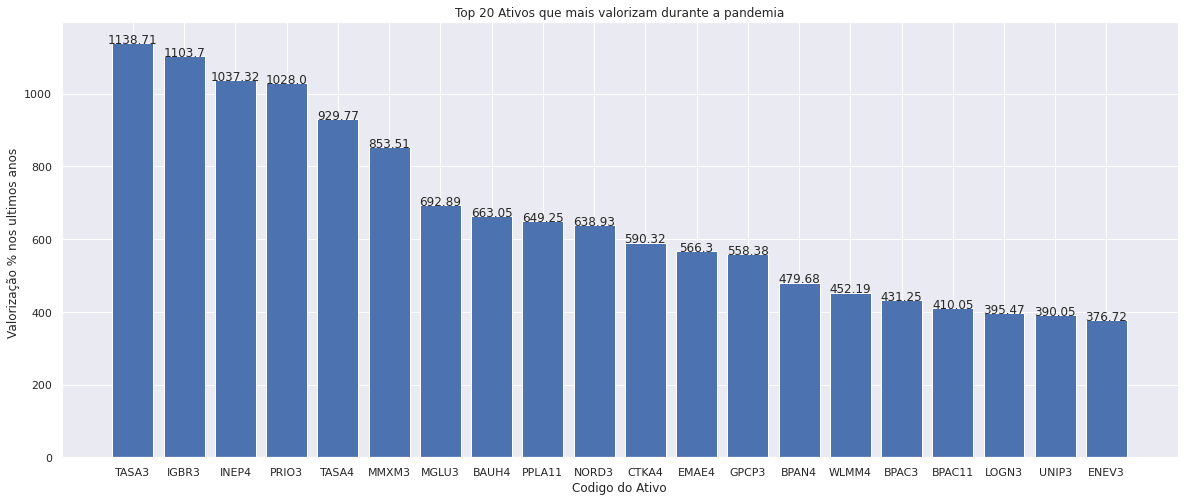

In [232]:
#Top 20 ativos mais valorizados
ativos_mais_valorizados_pandemia = variacao_ativos.nlargest(20, 'Valorização')

plt.figure(figsize=(20,8))
plt.bar('Codigo','Valorização',data=ativos_mais_valorizados_pandemia)
#plt.xticks('Codigo')
plt.xlabel("Codigo do Ativo")
plt.ylabel("Valorização % nos ultimos anos ")
plt.title("Top 20 Ativos que mais valorizam durante a pandemia")

for i, v in enumerate(ativos_mais_valorizados_pandemia['Valorização']):
  plt.text(x=i , y = v + 10 , s=f"{v}",
           horizontalalignment='center',
           verticalalignment='center',
           fontdict=dict(fontsize=12)
           )

plt.show()

## Subsetores que melhor e pior perfomaram no periodo da pandemia